# Exporting int vectors and treemap analysis

## Loading data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [39]:
d = {}

with open("ints.csv", 'r') as file:
    reader = csv.reader(file)

    for row in reader:
        key = (
            row[0],
            row[1].split("-")[0],
            row[1].split("-")[1]
        )
        
        if key not in d:
            d[key] = {}
            
        size = int(row[3])
        
        if size not in d[key]:
            d[key][size] = [[], []]
        
        d[key][size][0].append(float(row[4])) # Fill time
        d[key][size][1].append(float(row[6])) # Sum time

def is_optimal(key):
    return (key[1] == 'IntVector' and key[2] == 'V') or (key[1] == 'IntTree' and key[2] == 'T')


def avg(l):
    i = 0
    for x in l:
        i += x
    return i / len(l)

def avg_min(l):
    i = l[0]
    for x in l:
        i = min(i, x)
    return i

for x in d:
    for s in d[x]:
        d[x][s][0] = avg(d[x][s][0])
        d[x][s][1] = avg(d[x][s][1])

for x in d:
    print(str(x) + " " + str(d[x]))
    break

('JS', 'IntVector', 'V') {1000: [0.0025500357998535033, 0.00023673219960182904], 10000: [0.014885104600153864, 0.00033066299986094237], 100000: [0.035775743399746714, 0.00039556800015270717], 1000000: [0.26374745480008427, 0.0004041050000116229], 10000000: [2.345133465200104, 0.0005100769996643067]}


## Draw plot functions

In [61]:
# Selection : All, Load or Sum

def draw_plot(selection, platforms, datastructures, tests, only_on_opt=False):
    def make_title(p, dd, t):
        zz = ""
        
        if len(platforms) != 1:
            zz += p + " "        
        if len(datastructures) != 1:
            zz += dd + " "        
        if len(tests) != 1:
            zz += t + " "
            
        return zz
    
    if only_on_opt:
        tests = ['V', 'T']
    
    for platform in platforms:
        for datastructure in datastructures:
            for test in tests:
                x = []
                y = []
                
                for entry in d:
                    if entry[0] == platform and entry[1] == datastructure and entry[2] == test:
                        if only_on_opt and not is_optimal(entry):
                            continue
                        
                        for size in d[entry]:
                            x.append(size)
                            t = 0
                            if selection != "Sum":
                                t += d[entry][size][0]
                            if selection != "Load":
                                t += d[entry][size][1]
                            
                            y.append(t)
                
                if len(x) > 0:
                    plt.loglog(x, y, label=make_title(platform, datastructure, test))
                    #plt.plot(x, y, label=make_title(platform, datastructure, test))
                
    plt.legend()
    plt.show()
    
plt.rcParams["figure.figsize"]=10,5

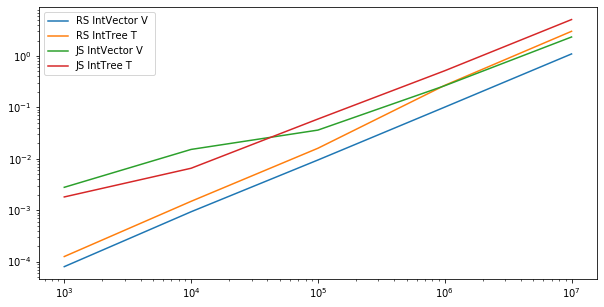

In [41]:
draw_plot("All", ["RS", "JS"], ["IntVector", "IntTree"], ['T', 'V', 'CT', 'CV'], True)

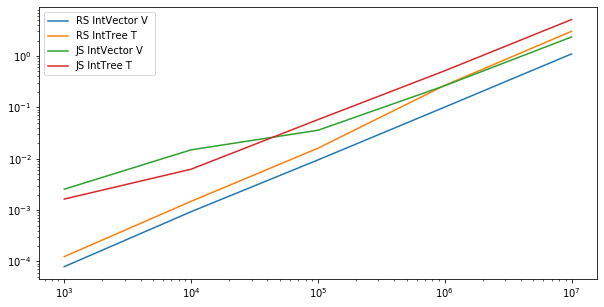

In [42]:
draw_plot("Load", ["RS", "JS"], ["IntVector", "IntTree"], ['T', 'V', 'CT', 'CV'], True)

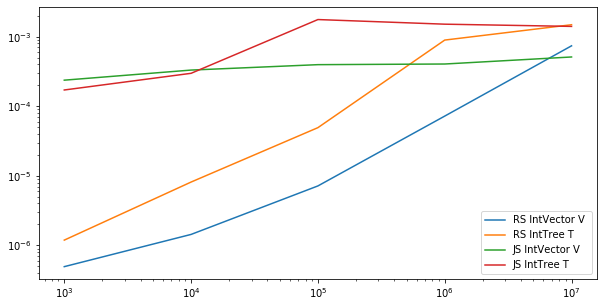

In [43]:
draw_plot("Sum", ["RS", "JS"], ["IntVector", "IntTree"], ['T', 'V', 'CT', 'CV'], True)

There is a plateau because IntTree is a Map and at some point, every number has been added so the tree's structure doesn't change anymore

## idk

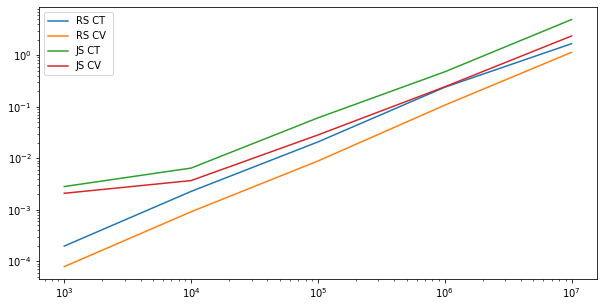

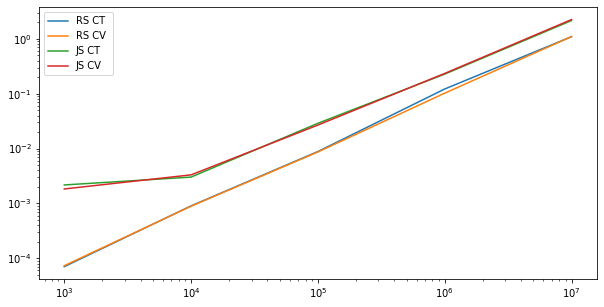

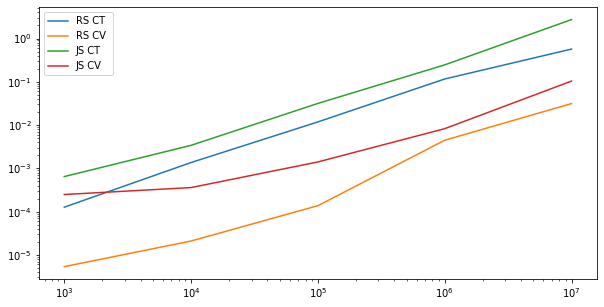

In [50]:
draw_plot("All", ["RS", "JS"], ["IntVector"], ['CT', 'CV'])
draw_plot("Load", ["RS", "JS"], ["IntVector"], ['CT', 'CV'])
draw_plot("Sum", ["RS", "JS"], ["IntVector"], ['CT', 'CV'])

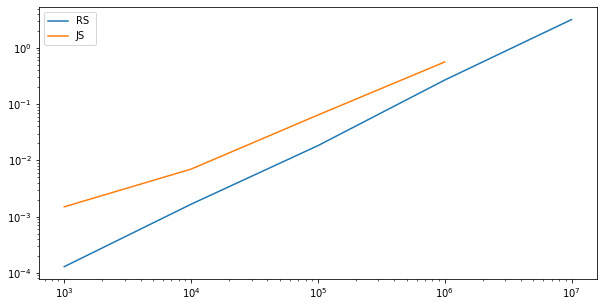

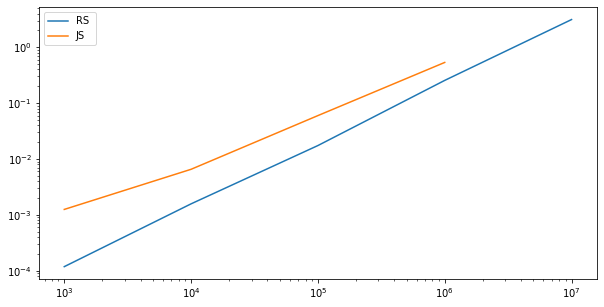

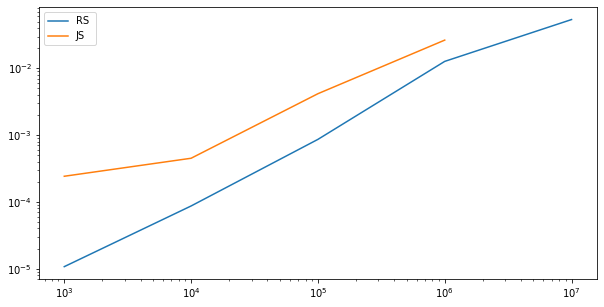

In [49]:
draw_plot("All", ["RS", "JS"], ["IntTree"], ['CV'])
draw_plot("Load", ["RS", "JS"], ["IntTree"], ['CV'])
draw_plot("Sum", ["RS", "JS"], ["IntTree"], ['CV'])

## Everything

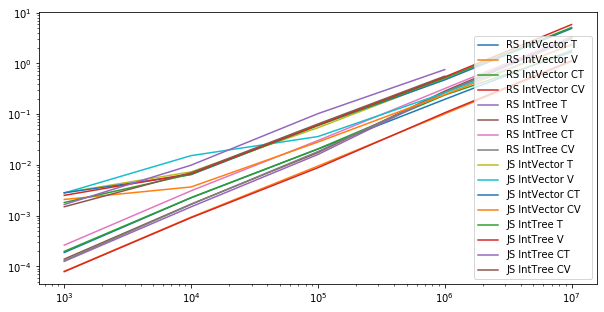

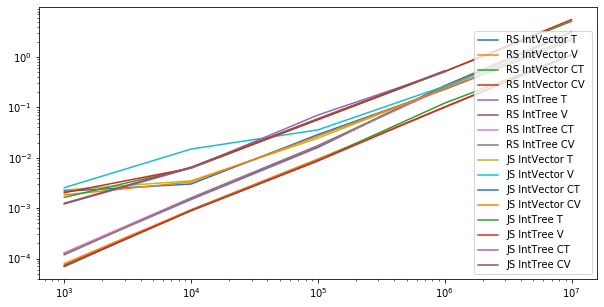

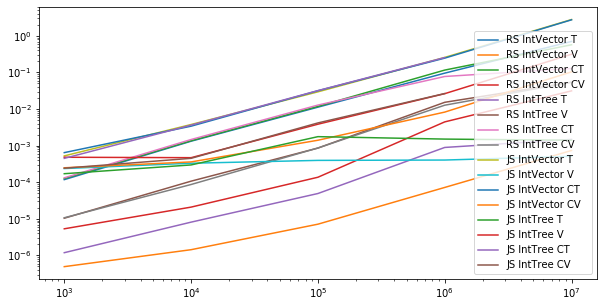

In [51]:
for method in ["All", "Load", "Sum"]:
    draw_plot(method, ["RS", "JS"], ["IntVector", "IntTree"], ['T', 'V', 'CT', 'CV'])

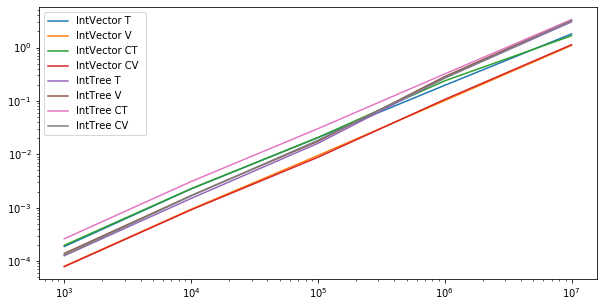

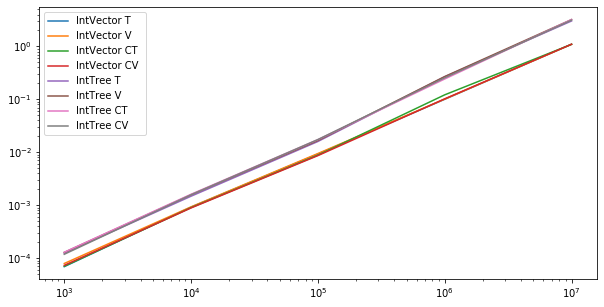

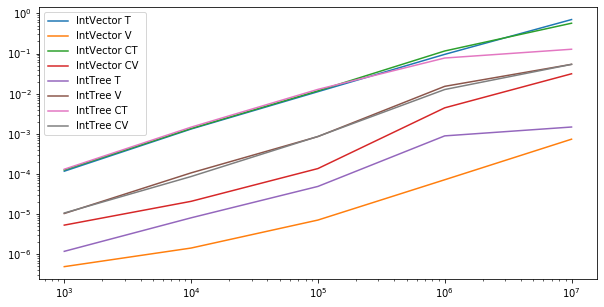

In [52]:
for method in ["All", "Load", "Sum"]:
    draw_plot(method, ["RS"], ["IntVector", "IntTree"], ['T', 'V', 'CT', 'CV'])

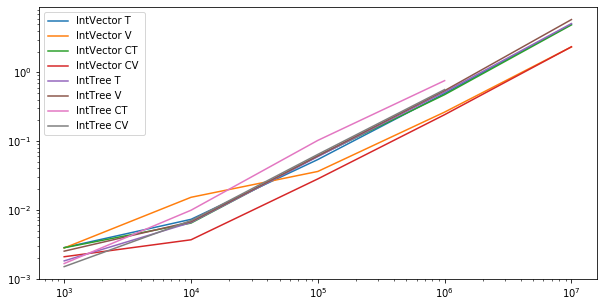

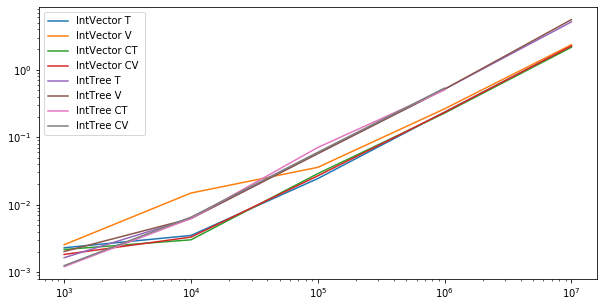

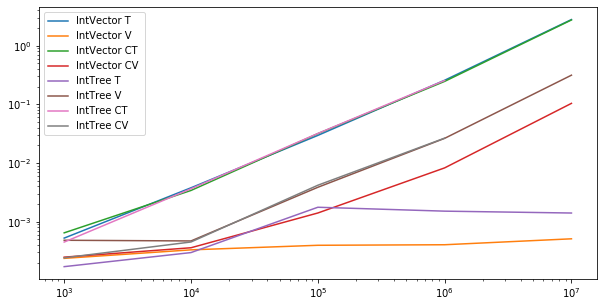

In [53]:
for method in ["All", "Load", "Sum"]:
    draw_plot(method, ["JS"], ["IntVector", "IntTree"], ['T', 'V', 'CT', 'CV'])

## idk

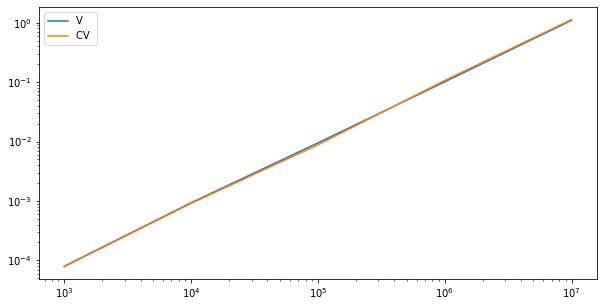

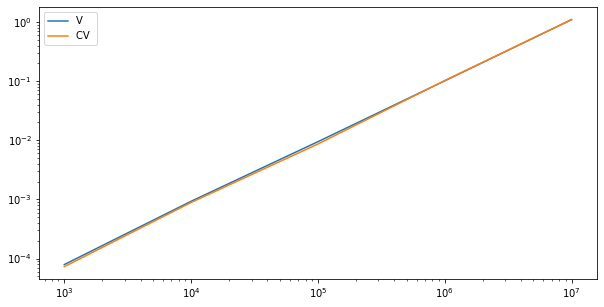

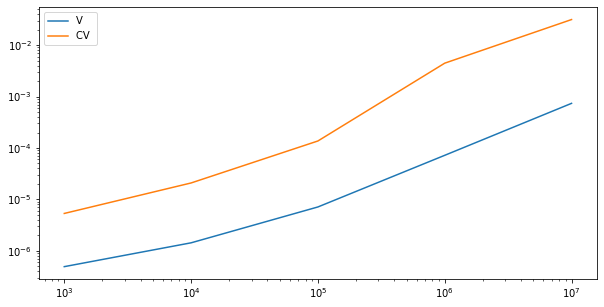

In [63]:
for method in ["All", "Load", "Sum"]:
    draw_plot(method, ["RS"], ["IntVector"], ['V', 'CV'])

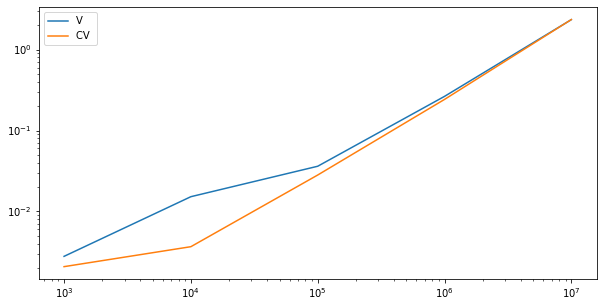

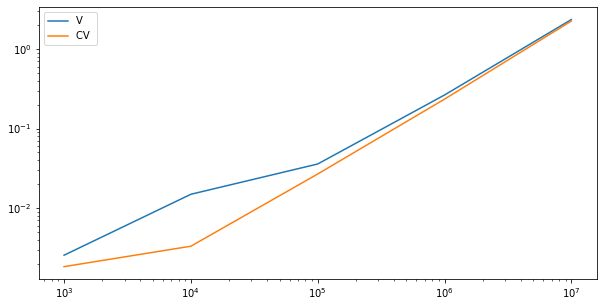

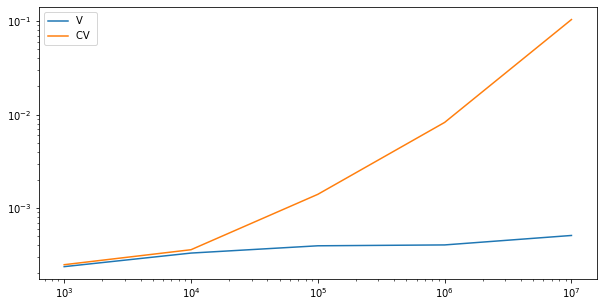

In [62]:
for method in ["All", "Load", "Sum"]:
    draw_plot(method, ["JS"], ["IntVector"], ['V', 'CV'])